In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_C.csv')
df
df['h'] = 512
df['w'] = 1024
df.to_csv('/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_C.csv', index=False)

In [ ]:
from PIL import Image

image = Image.open('/content/drive/MyDrive/VolleyBall_model/train/images/1000.PNG')
image.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/VolleyBall_model/train/images/1000.PNG'

In [ ]:
!pip install -r /content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 105.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 111.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_D.csv')


frame_num    0
x            0
y            0
visible      0
h            0
w            0
dtype: int64

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image
import argparse
import pandas as pd
import numpy as np
import abc
import sys
import os

# if "ipykernel" in sys.modules:  # executed in a jupyter notebook
#     from tqdm.notebook import tqdm
# else:
#     from tqdm import tqdm
from tqdm import tqdm

from pathlib import Path
import cv2 as cv
sequence_starters = {}
sequence_length = 3
include_dups = True
csvs_dir = Path('/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs')
print('Calculating sequence starters...')
for csv_path in tqdm(list(csvs_dir.glob("*.csv"))):
  sequence_starters[csv_path.stem] = []
  # reset prev_nums
  prev_nums = [-sequence_length] * (sequence_length - 1)
  print(csv_path)
  df = pd.read_csv(csv_path)
  for _, row in df.iterrows():
  # checking if the sequence is consecutive
    for i, prev_num in enumerate(prev_nums, start=1):
      if prev_num != row["frame_num"] - i:
        break
    else:
      sequence_starters[csv_path.stem].append(
        int(row["frame_num"]) - (sequence_length - 1))
        # reset prev_nums
      if not include_dups:
        prev_num = [-sequence_length] * (sequence_length - 1)
      continue
    prev_nums = [row["frame_num"]] + prev_nums[:-1]
print()

Calculating sequence starters...


100%|██████████| 5/5 [00:00<00:00, 36.50it/s]

/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_A.csv
/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_B.csv
/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_C.csv
/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_E.csv
/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/csvs/frames_D.csv



In [ ]:
# sequence_starters

In [ ]:
def generate_heatmap_2(center_x, center_y, width, height):
        """ Make a square gaussian kernel.

        size is the length of a side of the square
        fwhm is full-width-half-maximum, which
        can be thought of as an effective radius.

        source: https://stackoverflow.com/questions/7687679/how-to-generate-2d-gaussian-with-python
        """
        x = np.arange(0, 1024, 1, float)
        y = np.arange(0, 512, 1, float)[:,np.newaxis]

        x0 = 1024*center_x
        y0 = 512*center_y
        width = 0.05*width
        height = 0.05*height

        image = np.exp(-4*np.log(2) * ((x-x0)**2/width**2 + (y-y0)**2/height**2))
        return image


In [ ]:
from PIL import Image
import torchvision.transforms as transforms
images_folder = Path('/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/train/images')
grayscale = True
def get_images(img_dir, rel_idx):
    images = []
    #print(sequence_length)
    for i in range(sequence_length):
        image_path = images_folder / img_dir / str(rel_idx+i)
        img = torch.tensor([], requires_grad=False)
        if image_path.with_suffix(".PNG").is_file():
            img = torchvision.io.read_image(str(image_path.with_suffix(".PNG")))
            # if grayscale:
            #   img = Image.open(str(image_path.with_suffix(".PNG"))).convert('L')
            #   transform = transforms.ToTensor()
            #   img = transform(img)
            #   print(img.shape)
        elif image_path.with_suffix(".jpeg").is_file():
            img = torchvision.io.read_image(image_path.with_suffix(".jpeg"))
        elif image_path.with_suffix(".jpg").is_file():
            img = torchvision.io.read_image(str(image_path.with_suffix(".jpg")))
        else:
            raise Exception(f"Image {rel_idx} in folder {img_dir} not found")

        img = torchvision.transforms.functional.resize(img, [512,1024])
        img = img.type(torch.float32)
        img *= 1 / 255
        images.append(img)

    return torch.concatenate(images)


In [ ]:
def getitem(idx):
    rel_idx = idx
    img_name = ""

    for curr_name in list(csvs_dir.glob("*.csv")):
        starters = sequence_starters[curr_name.stem]
        # next folder
        if rel_idx >= len(starters):
            rel_idx -= len(starters)
            continue
        # found the folder
        img_name = curr_name.stem
        rel_idx = starters[rel_idx]
        break

    df = pd.read_csv((csvs_dir / img_name).with_suffix(".csv"))
    df = df.loc[df['frame_num'].isin(range(rel_idx, rel_idx + sequence_length))]
    heatmaps = []
    for _, row in df.iterrows():
        heatmaps.append(generate_heatmap_2(row["x"], row["y"], row["w"], row["h"]))

    heatmaps = np.stack(heatmaps, axis=0)

    heatmaps = torch.tensor(heatmaps, requires_grad=False, dtype=torch.float32)
    images = get_images(img_name, int(rel_idx))

    return (images, heatmaps)



In [ ]:
class GenericDataset(Dataset):
    def __init__(self, csvs_dir, sequence_length, sequence_starters, one_output_frame=False, grayscale=True):
        self.csvs_dir = csvs_dir
        self.sequence_length = sequence_length
        self.one_output_frame = one_output_frame
        self.grayscale = grayscale
        self.sequence_starters = sequence_starters
    def generate_heatmap_2(center_x, center_y, width, height):
        """ Make a square gaussian kernel.

        size is the length of a side of the square
        fwhm is full-width-half-maximum, which
        can be thought of as an effective radius.

        source: https://stackoverflow.com/questions/7687679/how-to-generate-2d-gaussian-with-python
        """
        x = np.arange(0, 1024, 1, float)
        y = np.arange(0, 512, 1, float)[:,np.newaxis]

        x0 = 1024*center_x
        y0 = 512*center_y
        width = 0.05*width
        height = 0.05*height

        image = np.exp(-4*np.log(2) * ((x-x0)**2/width**2 + (y-y0)**2/height**2))
        return image

    def __len__(self):
        return sum(len(s) for s in self.sequence_starters.values())

    def __getitem__(self, idx):
        rel_idx = idx
        img_name = ""

        for curr_name in list(self.csvs_dir.glob("*.csv")):
            starters = self.sequence_starters[curr_name.stem]
            # next folder
            if rel_idx >= len(starters):
                rel_idx -= len(starters)
                continue
            # found the folder
            img_name = curr_name.stem
            rel_idx = starters[rel_idx]
            break

        df = pd.read_csv((self.csvs_dir / img_name).with_suffix(".csv"))
        if 'w' not in df.columns:
            df['w'] = 50
        if 'h' not in df.columns:
            df['h'] = 50
        if self.one_output_frame:
            df = df.loc[df['frame_num'] == rel_idx + self.sequence_length // 2].iloc[0]
            heatmaps = self.generate_heatmap_2(df["x"], df["y"], df["w"], df["h"])
            # heatmaps = self.generate_heatmap(df["x"], df["y"], 100, 50)

            heatmaps = np.expand_dims(heatmaps, axis=0)
        else:
            df = df.loc[df['frame_num'].isin(range(rel_idx, rel_idx + self.sequence_length))]
            heatmaps = []
            for _, row in df.iterrows():
                heatmaps.append(generate_heatmap_2(row["x"], row["y"], row["w"], row["h"]))
                # heatmaps.append(self.generate_heatmap(row["x"], row["y"], 100, 50))
            heatmaps = np.stack(heatmaps, axis=0)

        heatmaps = torch.tensor(heatmaps, requires_grad=False, dtype=torch.float32)
        images = get_images(img_name, int(rel_idx))

        if self.grayscale:
            X_grayscale = [torchvision.transforms.functional.rgb_to_grayscale(images[3*i:3*(i+1),:,:]) for i in range(self.sequence_length)]
            images = torch.cat(X_grayscale, axis=0)

        return images, heatmaps


In [ ]:
def get_ball_position(img, original_img_=None):
    brightness_thresh = 0.5
    ret, thresh = cv.threshold(img, brightness_thresh, 1, 0)
    thresh = cv.convertScaleAbs(thresh)

    contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    if len(contours) != 0:

        #find the biggest area of the contour
        c = max(contours, key = cv.contourArea)

        if original_img_ is not None:
            # the contours are drawn here
            cv.drawContours(original_img_, [c], -1, 255, 3)

        x,y,w,h = cv.boundingRect(c)
        return x, y, w, h

0:  torch.Size([2, 3, 512, 1024]) torch.Size([2, 1, 512, 1024])


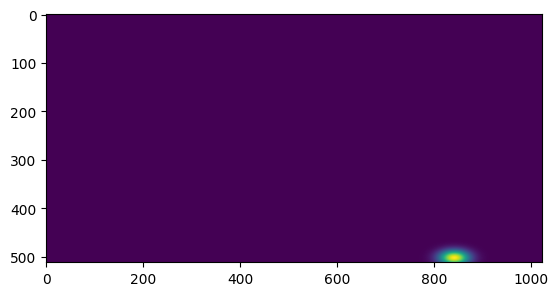

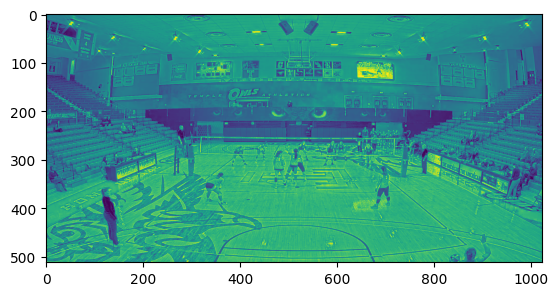

In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
dataset = GenericDataset(csvs_dir, sequence_length, sequence_starters=sequence_starters)
to_pil = ToPILImage()

dl = DataLoader(dataset, batch_size=2)
for i, (x, y) in enumerate(dl):
  print(f"{i}: ", x.shape, y.shape)
  for i in range(sequence_length):

    plt.imshow(y[0][i].squeeze(0))
    plt.show()
    image_pil = to_pil(y[0][i].squeeze(0))
    image_pil.save('saved_image.png')

    #print(y[0][i].squeeze(0).numpy())
    #get_ball_position(y[0][i].squeeze(0).numpy(), x[0][i].numpy())
    # print(f"shape {y[0].shape}, {x[0].shape}")
    plt.imshow(x[0][i])
    plt.show()
    image_pil = to_pil(x[i])
    image_pil.save('saved_image2.png')
    break
  break






In [2]:
import torch
from torch import nn
class TrackNet(nn.Module):
    def _make_convolution_sublayer(self, in_channels, out_channels, dropout_rate=0.0):
        layer = [
            nn.Conv2d(in_channels, out_channels, kernel_size=(3, 3), padding="same"),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=out_channels)
        ]
        if dropout_rate > 1e-15:
            print('!'*50, 'dropout used!')
            layer.append(nn.Dropout(dropout_rate))
        return nn.Sequential(*layer)


    def _make_convolution_layer(self, in_channels, out_channels, num, dropout_rate=0.0):
        layers = []
        layers.append(self._make_convolution_sublayer(in_channels, out_channels, dropout_rate=dropout_rate))
        for _ in range(num-1):
            layers.append(self._make_convolution_sublayer(out_channels, out_channels, dropout_rate=dropout_rate))

        return nn.Sequential(*layers)


    def __init__(self):
        super().__init__()
        grayscale=True
        dropout = 0.0
        one_output_frame = False
        sequence_length = 3
        # VGG16
        if grayscale:
            self.vgg_conv1 = self._make_convolution_layer(sequence_length, 64, 2, dropout_rate=dropout)
        else:
            self.vgg_conv1 = self._make_convolution_layer(3*sequence_length, 64, 2, dropout_rate=dropout)
        self.vgg_maxpool1 = nn.MaxPool2d((2,2), stride=(2,2))
        self.vgg_conv2 = self._make_convolution_layer(64, 128, 2, dropout_rate=dropout)
        self.vgg_maxpool2 = nn.MaxPool2d((2,2), stride=(2,2))
        self.vgg_conv3 = self._make_convolution_layer(128, 256, 3, dropout_rate=dropout)
        self.vgg_maxpool3 = nn.MaxPool2d((2,2), stride=(2,2))
        self.vgg_conv4 = self._make_convolution_layer(256, 512, 3, dropout_rate=dropout)

        # Deconv / UNet
        self.unet_upsample1 = nn.UpsamplingNearest2d(scale_factor=2)
        self.unet_conv1 = self._make_convolution_layer(768, 256, 3, dropout_rate=dropout)
        self.unet_upsample2 = nn.UpsamplingNearest2d(scale_factor=2)
        self.unet_conv2 = self._make_convolution_layer(384, 128, 2, dropout_rate=dropout)
        self.unet_upsample3 = nn.UpsamplingNearest2d(scale_factor=2)
        self.unet_conv3 = self._make_convolution_layer(192, 64, 2, dropout_rate=dropout)

        if one_output_frame:
            self.last_conv = nn.Conv2d(64, 1, kernel_size=(1,1), padding="same")
        else:
            self.last_conv = nn.Conv2d(64, sequence_length, kernel_size=(1,1), padding="same")
        self.last_sigmoid = nn.Sigmoid()


    def forward(self, x):
        # VGG16
        x1 = self.vgg_conv1(x)
        x = self.vgg_maxpool1(x1)
        x2 = self.vgg_conv2(x)
        x = self.vgg_maxpool2(x2)
        x3 = self.vgg_conv3(x)
        x = self.vgg_maxpool3(x3)
        x = self.vgg_conv4(x)

        # Deconv / UNet
        x = torch.concat([self.unet_upsample1(x), x3], dim=1)
        x = self.unet_conv1(x)
        x = torch.concat([self.unet_upsample2(x), x2], dim=1)
        x = self.unet_conv2(x)
        x = torch.concat([self.unet_upsample3(x), x1], dim=1)
        x = self.unet_conv3(x)

        x = self.last_conv(x)
        x = self.last_sigmoid(x)

        return x


    def save(self, path, whole_model=False):
        if whole_model:
            torch.save(self, path)
        else:
            torch.save(self.state_dict(), path)


    def load(self, path, device='cpu'):
        self.load_state_dict(torch.load(path, map_location=device)['model_state_dict'])



In [ ]:
from torch.utils.data import DataLoader, random_split
from argparse import ArgumentParser
from datetime import datetime
from pathlib import Path
import matplotlib as plt

import torch
from torch.utils.data import DataLoader, random_split
from torchvision.utils import save_image
import torchvision
import json

from sys import modules
if "ipykernel" in modules:  # executed in a jupyter notebook
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm


def training_loop(device, model, writer, loss_function, optimizer, train_loader, val_loader, save_path):
    best_val_loss = float('inf')
    epochs = 10
    grayscale=True
    log_period = 100
    checkpoint_period=1
    save_weights_only=False
    for epoch in range(epochs):
        tqdm.write("Epoch: " + str(epoch))
        running_loss = 0.0

        model.train()
        pbar = tqdm(train_loader)
        for batch_idx, (X, y) in enumerate(pbar):
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_pred = model(X)
            loss = loss_function(y_pred, y)
            loss.backward()
            optimizer.step()

            # running loss calculation
            running_loss += loss.item()
            pbar.set_description(f'Loss: {running_loss / (batch_idx+1):.6f}')

            if batch_idx % log_period == 0:
                with torch.inference_mode():
                    images = [
                        torch.unsqueeze(y[0,0,:,:], 0).repeat(3,1,1).cpu(),
                        torch.unsqueeze(y_pred[0,0,:,:], 0).repeat(3,1,1).cpu(),
                    ]
                    if grayscale:
                        images.append(X[0,:,:,:].cpu())
                        res = X[0,:,:,:] * y[0,0,:,:]
                        print(res.shape)
                    else:
                        images.append(X[0,(2,1,0),:,:].cpu())
                        res = X[0, (2,1,0),:,:] * y[0,0,:,:]
                    images.append(res.cpu())
                    print(f"images : {len(images)}")
                    grid = torchvision.utils.make_grid(images, nrow=1)#, padding=2)


        if val_loader is not None:
            best = False
            val_loss = validation_loop(device, model, loss_function, val_loader)
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best = True

            # save the model
            if epoch % checkpoint_period == checkpoint_period - 1:
                if save_weights_only:
                    tqdm.write('\n--- Saving weights to: ' + str(save_path))
                    torch.save(model.state_dict(), save_path / 'last.pth')
                    if best:
                        torch.save(model.state_dict(), save_path / 'best.pth')
                else:
                    tqdm.write('\n--- Saving checkpoint to: ' + str(save_path))
                    torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': val_loss,
                        }, save_path / 'last.pt')
                    if best:
                        torch.save({
                            'epoch': epoch,
                            'model_state_dict': model.state_dict(),
                            'optimizer_state_dict': optimizer.state_dict(),
                            'loss': val_loss,
                            }, save_path / 'best.pt')



def validation_loop(device, model, loss_function, val_loader):
    model.eval()
    loss_sum = 0
    with torch.inference_mode():
        for X, y in tqdm(val_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss_sum += loss_function(y_pred, y)
        tqdm.write('Validation loss: ' + str(loss_sum/len(val_loader)))

    return loss_sum/len(val_loader)

class AdaptiveWingLoss(torch.nn.Module):
    def __init__(self, omega=14, theta=0.5, epsilon=1, alpha=2.1):
        super(AdaptiveWingLoss, self).__init__()
        self.omega = omega
        self.theta = theta
        self.epsilon = epsilon
        self.alpha = alpha

    def forward(self, pred, target):
        '''
        :param pred: BxNxHxH
        :param target: BxNxHxH
        :return:
        '''

        y = target
        y_hat = pred
        delta_y = (y - y_hat).abs()
        delta_y1 = delta_y[delta_y < self.theta]
        delta_y2 = delta_y[delta_y >= self.theta]
        y1 = y[delta_y < self.theta]
        y2 = y[delta_y >= self.theta]
        loss1 = self.omega * torch.log(1 + torch.pow(delta_y1 / self.omega, self.alpha - y1))
        A = self.omega * (1 / (1 + torch.pow(self.theta / self.epsilon, self.alpha - y2))) * (self.alpha - y2) * (
            torch.pow(self.theta / self.epsilon, self.alpha - y2 - 1)) * (1 / self.epsilon)
        C = self.theta * A - self.omega * torch.log(1 + torch.pow(self.theta / self.epsilon, self.alpha - y2))
        loss2 = A * delta_y2 - C
        return (loss1.sum() + loss2.sum()) / (len(loss1) + len(loss2))
train_split = 0.8
train_size = int(train_split * len(dataset))
val_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=2)
loss_function = AdaptiveWingLoss()
images, heatmaps = next(iter(train_loader))
print('Loss using zeros: ', loss_function(torch.zeros_like(heatmaps), heatmaps), '\n')

save_path = Path('weights/') / datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
save_path.mkdir(parents=True, exist_ok=True)
print("Starting training")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
writer = None
model = TrackNet().to(device)
lr = 0.05
momentum = 0.9
weight_decay = 0.0
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)

training_loop(device, model, writer, loss_function, optimizer, train_loader, val_loader, save_path)


Loss using zeros:  tensor(0.0135) 

Starting training
Epoch: 0


  0%|          | 0/391 [00:00<?, ?it/s]

torch.Size([3, 512, 1024])
images : 4
torch.Size([3, 512, 1024])
images : 4
torch.Size([3, 512, 1024])
images : 4


In [1]:
def get_ball_position(img, original_img_=None):
    brightness_thresh = 0.4
    ret, thresh = cv.threshold(img, brightness_thresh, 1, 0)
    thresh = cv.convertScaleAbs(thresh)

    contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    if len(contours) != 0:

        #find the biggest area of the contour
        c = max(contours, key = cv.contourArea)
        x,y,w,h = cv.boundingRect(c)

        x= int((x/1024)*1920)
        y= int((y/512)*1080)
        w= int((w/1024) *1920)
        h= int((h/512) *1080)


        if original_img_ is not None:
            # the contours are drawn here
            cv.rectangle(original_img_, (x, y), (x + w, y + h), (0,255,0), 2)
        # x= float(x/1920)
        # y= float(y/1080)
        # w= float(w/1920)
        # h= float(h/1080)


        return x, y, w, h

In [ ]:
!cp -r /content/weights/ /content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/weights

In [8]:
import matplotlib.pyplot as plt
import torchvision
import torch
import cv2 as cv
import os
import matplotlib.pyplot as plt
dropout = 0
grayscale = True
weights = '/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/weights/weights/2024-04-23_14-33-34/best.pt'
device = torch.device('cuda')
model = TrackNet().to(device)
model.load(weights, device=device)
model.eval()
image_size = (512,1024)
sequence_length = 3
video = '/content/drive/MyDrive/TestClips/test_short.mp4'
cap = cv.VideoCapture(video)
videoEndReached = False

ball_coordinates = []
ret, frame = cap.read()
H, W, _ = frame.shape
video_path_out = '/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/testing_output/short_video_predicted.mp4'
out = cv.VideoWriter(video_path_out, cv.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv.CAP_PROP_FPS)), (W, H))
while cap.isOpened():
    frames = []
    for _ in range(sequence_length):
        ret, frame = cap.read()
        if not ret:
            videoEndReached = True
            break

        # frame_resized = cv.resize(frame, (1024,512))
        frames.append(frame)

    # print(len(frames))
    # break
    if videoEndReached:
        break

    frames_torch = []
    for frame in frames:
        # plt.imshow(frame)
        # plt.show()

        frame_torch = torch.tensor(frame).permute(2, 0, 1).float().to(device) / 255
        frame_torch = torchvision.transforms.functional.resize(frame_torch, image_size)
        if grayscale:
          grayscaled = torchvision.transforms.functional.rgb_to_grayscale(frame_torch)
        # print(grayscale[0].shape)
          # plt.imshow(grayscaled[0, :, :].cpu().numpy())
          # plt.show()
          frame_torch = grayscaled
          # plt.imshow(frame_torch[0].cpu().numpy())
          # plt.show()

        frames_torch.append(frame_torch)



    #frames need to be resized and normalized pixel-wise
    frames_torch = torch.cat(frames_torch, dim=0).unsqueeze(0)
    # print("frames torch")
    # print(frames_torch.shape)
    # break

    pred = model(frames_torch)
    pred = pred[0, :, :, :].detach().cpu().numpy()
    print(f"Pred: {pred.shape}")



    for i in range(sequence_length):
        # print("here")
        pred_frame = pred[i, :, :]
        # pred_frame = (pred_frame * 255).astype('uint8')  # Scale to 0-255 range
        # pred_frame = cv.cvtColor(pred_frame, cv.COLOR_RGB2BGR)
        # image_name = f"prediction_{i}.png"  # Define a unique image name
        # image_save_path = os.path.join("/content/output_directory", image_name)
        # cv.imwrite(image_save_path, pred_frame)

        # plt.imshow(pred_frame, cmap='gray')
        # plt.show()


        ball_position = get_ball_position(pred_frame, original_img_=frames[i])
        out.write(frames[i])
        # plt.imshow(frames[i])
        # plt.show()
        # ball_coordinates.append(ball_position)
        # print(ball_position)

    if cv.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv.destroyAllWindows()

# Now you have all ball coordinates in `ball_coordinates` list
print(ball_coordinates)


Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512, 1024)
Pred: (3, 512

In [3]:
import matplotlib.pyplot as plt
import torchvision
import torch
import cv2 as cv
import os
import matplotlib.pyplot as plt
dropout = 0
grayscale = True
weights = '/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/weights/weights/2024-04-22_18-26-18/best.pt'
device = torch.device('cuda')
model = TrackNet().to(device)
model.load(weights, device=device)
model.eval()
image_folder = '/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/testing_labeled/images'
def numerical_sort(value):
    try:
        return int(value.split('.')[0])
    except ValueError:
        return value

image_files = sorted(os.listdir(image_folder), key=numerical_sort)

image_size = (512,1024)
sequence_length = 3


ball_coordinates = {}


video_path_out = '/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/testing_output/metrics_video.mp4'
out = cv.VideoWriter(video_path_out, cv.VideoWriter_fourcc(*'MP4V'), 30, (1920, 1080))

for i in range(0, len(image_files), sequence_length):
    frames = []
    for j in range(sequence_length):
        index = i + j
        if index < len(image_files):
            image_file = image_files[index]
            image_path = os.path.join(image_folder, image_file)
            frame = cv.imread(image_path)
            frames.append(frame)

    print(len(frames))
#     # break
#     if videoEndReached:
#         break

    frames_torch = []
    for frame in frames:
        # plt.imshow(frame)
        # plt.show()

        frame_torch = torch.tensor(frame).permute(2, 0, 1).float().to(device) / 255
        frame_torch = torchvision.transforms.functional.resize(frame_torch, image_size)
        if grayscale:
          grayscaled = torchvision.transforms.functional.rgb_to_grayscale(frame_torch)
        # print(grayscale[0].shape)
          # plt.imshow(grayscaled[0, :, :].cpu().numpy())
          # plt.show()
          frame_torch = grayscaled
          # plt.imshow(frame_torch[0].cpu().numpy())
          # plt.show()

        frames_torch.append(frame_torch)



#     #frames need to be resized and normalized pixel-wise
    frames_torch = torch.cat(frames_torch, dim=0).unsqueeze(0)
#     # print("frames torch")
#     # print(frames_torch.shape)
#     # break

    pred = model(frames_torch)
    pred = pred[0, :, :, :].detach().cpu().numpy()
    #print(f"Pred: {pred.shape}")



    for j in range(sequence_length):
        #print(f"j: {j}")
        index = i + j
        pred_frame = pred[j, :, :]
#         # pred_frame = (pred_frame * 255).astype('uint8')  # Scale to 0-255 range
#         # pred_frame = cv.cvtColor(pred_frame, cv.COLOR_RGB2BGR)
#         # image_name = f"prediction_{i}.png"  # Define a unique image name
#         # image_save_path = os.path.join("/content/output_directory", image_name)  # Define the save path
#         # cv.imwrite(image_save_path, pred_frame)

        # plt.imshow(pred_frame, cmap='gray')
        # plt.show()

        ball_coordinates[image_files[index].split('.')[0]] = get_ball_position(pred_frame, original_img_=frames[j])
        out.write(frames[j])
#         out.write(frames[i])
        # plt.imshow(frames[j])
        # plt.show()
#         # ball_coordinates.append(ball_position)
#         # print(ball_position)

#     if cv.waitKey(10) & 0xFF == ord('q'):
#         break

# cap.release()
# out.release()
# cv.destroyAllWindows()

# # Now you have all ball coordinates in `ball_coordinates` list
out.release()
cv.destroyAllWindows()
print(ball_coordinates)


3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
{'829': (813, 480, 61, 67), '830': (811, 478, 65, 73), '831': (811, 480, 65, 71), '832': (823, 529, 35, 27), '833': (821, 527, 37, 29), '834': (821, 527, 39, 31), '835': (817, 542, 24, 18), '836': (817, 540, 28, 23), '837': (817, 542, 28, 21), '838': None, '839': None, '840': None, '

In [4]:
def yolobbox2bbox(x,y,w,h):
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2
    return x1, y1, x2, y2

In [5]:
img = cv.imread()

TypeError: imread() missing required argument 'filename' (pos 1)

In [6]:
import torch
import torchvision.ops as ops

labels_folder = '/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/testing_labeled/labels'
labels_files = sorted(os.listdir(labels_folder), key= numerical_sort)
iou_scores = []
true_positives = 0
false_positives = 0
total=0
threshold = 0.1
video_path_out = '/content/drive/MyDrive/VolleyBall_model/TrackNet_Trials/testing_output/metrics_iou.mp4'
out = cv.VideoWriter(video_path_out, cv.VideoWriter_fourcc(*'MP4V'), 30, (1920, 1080))
for file in labels_files:
  full_file= os.path.join(labels_folder, file)
  name = file.split('.')[0]
  f = open(full_file, 'r')
  first = f.read(1)
  if not first:
      continue
  else:
    f.seek(0)
    ls= f.readline().split(' ')
    # print(ls)
    x, y, w, h = ls[1], ls[2], ls[3], ls[4]
    x1, y1, x2, y2 = yolobbox2bbox(float(x), float(y), float(w), float(h))
    ls1=[]

    # print(x)
    x1= x1*1920
    y1= y1*1080
    x2= x2*1920
    y2= y2*1080
    ls1.append(x1)
    ls1.append(y1)
    ls1.append(x2)
    ls1.append(y2)
    # print(x1,y1,x2,y2)
    # x = int(float(x)*1920)
    # y = int(float(y)*1080)
    # w = int(float(w)*1920)
    # h = int(float(h)*1080)
    # print(x,y,w,h)

    if ball_coordinates[name] is not None:
      p1,p2,p3,p4 = ball_coordinates[name]
      # p1 = int(p1*1920)
      # p2 = int(p2*1080)
      # p3 = int(p3*1920)
      # p4 = int(p4*1080)
      image = cv.imread(os.path.join(image_folder, name+'.PNG'))
      # cv.resize(image, (1920, 1080))
      # xp1, yp1, xp2, yp2 = yolobbox2bbox(p1, p2, p3, p4)
      xp1 = p1
      yp1 = p2
      xp2 = p1+p3
      yp2 = p2+p4
      xp1, yp1, xp2, yp2 = int(xp1), int(yp1), int(xp2), int(yp2)

      cv.rectangle(image, (int(xp1), int(yp1)), (int(xp2), int(yp2)), (0,255,0), 2)
      #cv.rectangle(image, (x1,y1),(x2,y2), (0,255,0), 2)
      cv.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
      # cv.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)






      ls2=[]
      ls2.append(xp1)
      ls2.append(yp1)
      ls2.append(xp2)
      ls2.append(yp2)
      box1 = torch.tensor([ls1])
      box2 = torch.tensor([ls2])
      iou = ops.box_iou(box1, box2)
      iou_score = iou.numpy().item()
      text = "IoU: {:.2f}".format(iou_score)
      cv.putText(image, text, (int(xp1), int(yp1) - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
      # plt.imshow(image)
      # plt.show()
      out.write(image)
      if iou_score >= threshold:
        true_positives += 1
      else:
        false_positives += 1
      total+=1
      iou_scores.append(iou_score)
      print(iou_score)
      print(iou)
    else:
      iou_scores.append(0)
      continue
    # print(p1,p2,p3,p4)

    # print(x1,y1,x2,y2)
out.release()
cv.destroyAllWindows()

0.06815101206302643
tensor([[0.0682]])
0.04235227033495903
tensor([[0.0424]])
0.027143757790327072
tensor([[0.0271]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.11789355427026749
tensor([[0.1179]])
0.4266878366470337
tensor([[0.4267]])
0.3333500027656555
tensor([[0.3334]])
0.17751216888427734
tensor([[0.1775]])
0.22577232122421265
tensor([[0.2258]])
0.19998866319656372
tensor([[0.2000]])
0.13650363683700562
tensor([[0.1365]])
0.12784647941589355
tensor([[0.1278]])
0.1228000596165657
tensor([[0.1228]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.0
tensor([[0.]])
0.07089479267597198
tensor([[0.0709]])
0.11097896099090576
tensor([[0.1110]])
0.10044790059328079
tensor([[0.1004]])
0.1349476724863052

In [7]:
precision = true_positives / (true_positives + false_positives)
# accuracy = true_positives / total
avg_iou = sum(iou_scores)/len(iou_scores)
print(f"Average IOU: {avg_iou}")
print(f"Precision: {precision}")


Average IOU: 0.12331720057092177
Precision: 0.5953654188948306
